In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [2]:
cv = pd.read_csv('LMXB_only_processed.csv')
#display(cv)
cv = cv.drop(['index_compiled','class' ,'A_CLASS'] , axis=1)
cv_non_zero =  cv.loc[:,(cv !=0).any(axis=0)]
display(cv_non_zero)
top_f = np.loadtxt('rows/top_100_features.csv' , dtype='str')[:30]
cv_non_zero = cv_non_zero[top_f]
display(cv_non_zero)

FileNotFoundError: [Errno 2] No such file or directory: 'LMXB_only_processed.csv'

(30, 30)


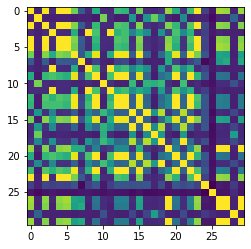

In [5]:
corr_mat =  np.corrcoef(cv_non_zero, rowvar=0)
print(corr_mat.shape)
plt.imshow(corr_mat)
plt.show()

In [7]:
import seaborn as sns

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x,y,size):
    fig , ax = plt.subplots(figsize=(18,14))

    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0]for p in enumerate(x_labels)}
    #display(x_to_num)
    y_to_num = {p[1]:p[0]for p in enumerate(y_labels)}

    color = [value_to_color(c) for c in size]
    size_scale = 200 
    ax.scatter(
        x = x.map(x_to_num),
        y = y.map(y_to_num),
        s = size * size_scale,
        marker = 's',
        
        c = color
    )

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45 , horizontalalignment='right')

    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    plt.savefig('plots/top_corr_30_lmxb.jpg')
    plt.show()


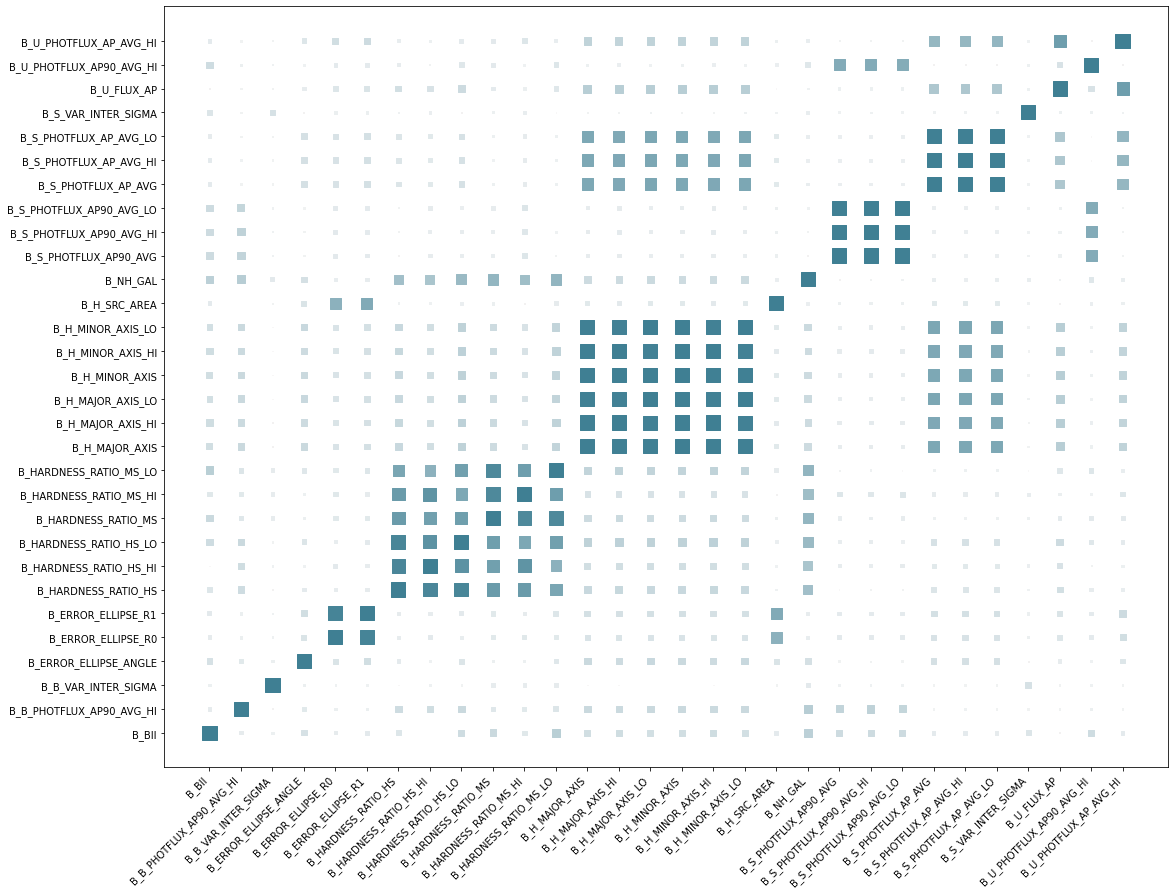

In [26]:

data = cv_non_zero
corr = data.corr()
corr = pd.melt(corr.reset_index() , id_vars='index')
corr.columns = ['x','y' ,'value']

heatmap(
    x=corr['x'], 
    y=corr['y'],
    size = corr['value'].abs())


In [18]:
display(corr)

x                       y     value
0                       B_BII                   B_BII  1.000000
1                    B_NH_GAL                   B_BII  0.440810
2    B_S_PHOTFLUX_AP90_AVG_HI                   B_BII  0.457302
3       B_S_PHOTFLUX_AP90_AVG                   B_BII  0.453548
4      B_HARDNESS_RATIO_HS_HI                   B_BII  0.334934
..                        ...                     ...       ...
895     B_ERROR_ELLIPSE_ANGLE  B_U_PHOTFLUX_AP_AVG_HI  0.175060
896  B_B_PHOTFLUX_AP90_AVG_HI  B_U_PHOTFLUX_AP_AVG_HI  0.889707
897       B_S_VAR_INTER_SIGMA  B_U_PHOTFLUX_AP_AVG_HI -0.039628
898  B_U_PHOTFLUX_AP90_AVG_HI  B_U_PHOTFLUX_AP_AVG_HI  0.999944
899    B_U_PHOTFLUX_AP_AVG_HI  B_U_PHOTFLUX_AP_AVG_HI  1.000000

[900 rows x 3 columns]

In [22]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]